In [1]:
import psycopg2
import pandas as pd

# Database connection parameters
db_params = {
    "dbname": "zwanzigminuten",
    "user": "postgres",
    "password": "vQVXEEnnhC",
    "host": "100.106.239.63",
    "port": "5433"  # Default is 5432
}

# Establish a connection to the database
try:
    conn = psycopg2.connect(**db_params)
    print("Database connection successful.")
except Exception as e:
    print(f"Error connecting to database: {e}")
    raise

# SQL query to select all entries from the table
table_name = "htmlraw"
sql_query = f"SELECT * FROM {table_name};"

# Execute the query and load the results into a pandas DataFrame
try:
    df = pd.read_sql(sql_query, conn)
    print("Data fetched successfully.")
except Exception as e:
    print(f"Error executing query: {e}")
    raise
finally:
    conn.close()
    print("Database connection closed.")

# Display the DataFrame (optional)
print(df)

Database connection successful.


/tmp/ipykernel_315334/1925794634.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


Data fetched successfully.
Database connection closed.
                                                  url  \
0   https://www.20min.ch/story/japan-wegen-korrupt...   
1   https://www.20min.ch/story/lucas-haenni-singt-...   
2   https://www.20min.ch/story/faktencheck-bevoelk...   
3   https://www.20min.ch/story/mehrere-stichwunden...   
4   https://www.20min.ch/story/mallorca-betroffene...   
..                                                ...   
84  https://www.20min.ch/story/voller-adrenalin-na...   
85  https://www.20min.ch/story/beziehungs-aus-verf...   
86  https://www.20min.ch/story/abnehmpille-dieser-...   
87  https://www.20min.ch/story/bvg-reform-wegen-ah...   
88  https://www.20min.ch/story/zuerich-stromausfal...   

                                                 html  
0   <!DOCTYPE html><html lang="de"><head><meta cha...  
1   <!DOCTYPE html><html lang="de"><head><meta cha...  
2   <!DOCTYPE html><html lang="de"><head><meta cha...  
3   <!DOCTYPE html><html lang="de"><

In [2]:
from bs4 import BeautifulSoup
import json
soup = BeautifulSoup(df['html'][0], 'html.parser')
print(soup.title.string)


Fumio Kishida kündigt wegen Korruption Rückzug an - 20 Minuten


In [23]:
json_ld_scripts = soup.find_all('script', type='application/ld+json')

# Initialize variables to store the extracted data
date_published = None
author_name = None
article_section = None

# Iterate over all found scripts
for script in json_ld_scripts:
    try:
        # Parse the JSON content
        json_content = json.loads(script.string)
        print(json_content)
        # Check if it's a NewsArticle type
        if json_content.get('@type') == 'NewsArticle':
            # Extract datePublished if available
            date_published = json_content.get('datePublished')
            
            # Extract author name if available
            author = json_content.get('author', [])
            
            article_section = json_content.get('articleSection')
            if author:
                author_name = author[0].get('name')
            break  # Exit loop after finding the desired data
    except json.JSONDecodeError:
        # If the content is not valid JSON, continue with the next script
        continue

# Print the results
print(f"Date Published: {date_published}")
print(f"Author Name: {author_name}")
print(f"Article Section: {article_section}")

{'@context': 'http://schema.org', '@type': 'BreadcrumbList', 'itemListElement': [{'@type': 'ListItem', 'position': 1, 'item': {'@id': 'https://www.20min.ch/', 'name': 'Front'}}, {'@type': 'ListItem', 'position': 2, 'item': {'@id': 'https://www.20min.ch/ausland', 'name': 'Ausland'}}, {'@type': 'ListItem', 'position': 3, 'item': {'@id': 'https://www.20min.ch/story/japan-wegen-korruption-premier-kishida-kuendigt-rueckzug-an-103168710', 'name': 'Fumio Kishida kündigt wegen Korruption Rückzug an'}}]}
{'@context': 'http://schema.org', '@type': 'NewsArticle', 'mainEntityOfPage': {'@type': 'WebPage', '@id': 'https://www.20min.ch/story/japan-wegen-korruption-premier-kishida-kuendigt-rueckzug-an-103168710'}, 'publisher': {'@type': 'NewsMediaOrganization', 'name': '20 Minuten', 'url': 'https://www.20min.ch', 'email': 'redaktion@20minuten.ch', 'telephone': '+41(0)442486820', 'sameAs': ['https://www.facebook.com/20min', 'https://twitter.com/20min', 'https://www.instagram.com/20min.ch', 'https://de.

In [22]:
kommentare = soup.find('div', attrs={'id': 'commentSection'})
kommentare = kommentare.find('div', attrs={'class': 'sc-5494f02e-0 gWnvCT'})
kommentare = kommentare.get_text()
n_kommentare = kommentare.split()[0]
print(n_kommentare)

5


In [8]:
df_features = pd.DataFrame(columns=['title', 'n_kommentare', 'date_published', 'author_name', 'article_section'])

for row in df.iterrows():
    soup = BeautifulSoup(row[1]['html'], 'html.parser')
    title = soup.title.string
    
    json_ld_scripts = soup.find_all('script', type='application/ld+json')

    # Initialize variables to store the extracted data
    date_published = None
    author_name = None
    article_section = None
    
    # Iterate over all found scripts
    for script in json_ld_scripts:
        try:
            # Parse the JSON content
            json_content = json.loads(script.string)
            # Check if it's a NewsArticle type
            if json_content.get('@type') == 'NewsArticle':
                # Extract datePublished if available
                date_published = json_content.get('datePublished')
                
                # Extract author name if available
                author = json_content.get('author', [])
                
                article_section = json_content.get('articleSection')
                if author:
                    author_name = author[0].get('name')
                break  # Exit loop after finding the desired data
        except json.JSONDecodeError:
            # If the content is not valid JSON, continue with the next script
            continue
    
    try:
        kommentare = soup.find('div', attrs={'id': 'commentSection'})
        kommentare = kommentare.find('div', attrs={'class': 'sc-5494f02e-0 gWnvCT'})
        kommentare = kommentare.get_text()
        n_kommentare = kommentare.split()[0]
    except Exception as e:
        n_kommentare = None
    print(f'{title}; Kommentare: {n_kommentare}; Date Published: {date_published}; Author Name: {author_name}; Article Section: {article_section} \n')
    # add the extracted data to the DataFrame
    new_row = pd.DataFrame({'title': title, 'n_kommentare': n_kommentare, 'date_published': date_published, 'author_name': author_name, 'article_section': article_section}, index=[0])
    df_features = pd.concat([df_features, new_row], ignore_index=True)
    

Fumio Kishida kündigt wegen Korruption Rückzug an - 20 Minuten; Kommentare: 5; Date Published: 2024-08-14T09:59:37+02:00; Author Name: AFP/sim; Article Section: Ausland 

Luca Hänni singt über Ex, Christina ist nicht eifersüchtig - 20 Minuten; Kommentare: 0; Date Published: 2024-08-15T17:11:57+02:00; Author Name: Gina Sergi; Article Section: People 

Kamala Harris: Versprecher in Klimarede führt zu Falschbehauptung - 20 Minuten; Kommentare: 48; Date Published: 2024-08-07T05:04:54+02:00; Author Name: Fee Anabelle Riebeling; Article Section: Faktenchecks 
Messer-Attacke auf Papa von Lamine Yamal: Jetzt gibt es Updates - 20 Minuten; Kommentare: None; Date Published: 2024-08-15T15:37:54+02:00; Author Name: Nils Hänggi; Article Section: Fussball 

Betroffene berichten: «Wir sitzen seit 6 Stunden im Flugzeug fest» - 20 Minuten; Kommentare: None; Date Published: 2024-08-15T15:47:18+02:00; Author Name: Benedikt Hollenstein; Article Section: Ausland 

«Sie haben nicht das Recht zu sagen, ich se

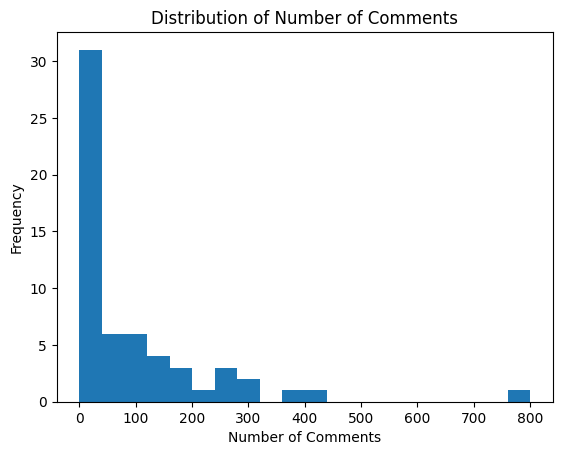

In [14]:
import matplotlib.pyplot as plt

df_features['n_kommentare'] = df_features['n_kommentare'].astype(float)
df_features['date_published'] = pd.to_datetime(df_features['date_published'])

plt.hist(df_features['n_kommentare'], bins=20)
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Comments')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a None

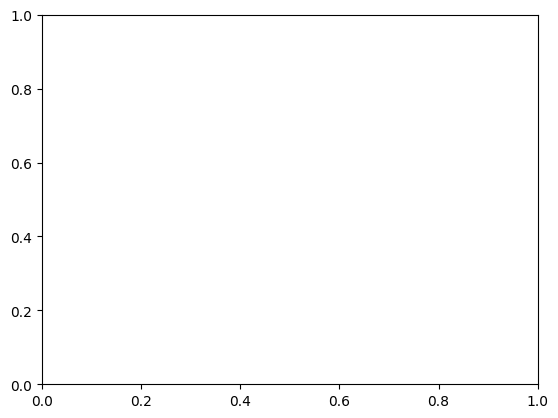

In [21]:
# Count the number of articles per author
df_features['author_name'].value_counts()

